<a href="https://colab.research.google.com/github/G0rav/image_similarity_search/blob/main/combined_approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf


In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

# Resnet50

In [75]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [76]:
size = (28,28)
def preprocess_image(image_path):
    img = load_img(image_path, target_size=size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(model, img, image_path=None):
    if image_path:
      img = preprocess_image(image_path)
    features = model.predict(img)
    return features

def compute_similarity(query_features, all_features):
    similarities = cosine_similarity(query_features, all_features)
    return similarities

def load_data():

    x_rain_images_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(x_train[:500], axis=-1))
    x_test_images_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(x_test[:500], axis=-1))

    # x_train_resized = tf.image.resize(x_train[:1000], (224, 224))
    # x_test_resized = tf.image.resize(x_test[:1000], (224, 224))

    x_train_resized = preprocess_input(x_rain_images_rgb.numpy())
    x_test_resized = preprocess_input(x_test_images_rgb.numpy())

    return x_train_resized, x_train, x_test_resized, x_test, y_train, y_test

def visualize_similar_images(query_image, similar_indices, dataset,y, num_similar=5):
    plt.figure(figsize=(10, 2))

    plt.subplot(1, num_similar + 1, 1)
    plt.imshow(query_image.astype("uint8"))
    plt.title("Query Image")
    plt.axis('off')

    for i, idx in enumerate(similar_indices[:num_similar]):
        print(y[idx])
        plt.subplot(1, num_similar + 1, i + 2)
        plt.imshow(dataset[idx].astype("uint8"))
        plt.title(f"Similar {i + 1}")
        plt.axis('off')
    plt.show()


In [77]:
x_train1, xtrn, x_test1, xtst,y_train1, y_test1 = load_data()
x_train1.shape

(500, 28, 28, 3)

## Model Load


In [78]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling='avg',
    classes=1000,
    classifier_activation='softmax'
)
model = Model(inputs=base_model.input, outputs=base_model.output)

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [79]:
features = model.predict(x_train1, batch_size=32, verbose=1)
print(features.shape)
print(features)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step
(500, 2048)
[[0.46741146 0.24615991 0.         ... 0.         0.         8.935979  ]
 [0.         1.4760422  0.         ... 0.         0.         0.        ]
 [0.         2.325377   0.         ... 0.         0.         5.9510365 ]
 ...
 [0.         0.         1.2239276  ... 0.         0.         5.6612644 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.8340969  0.         ... 0.         0.         0.        ]]


(28, 28, 3) (28, 28)
9


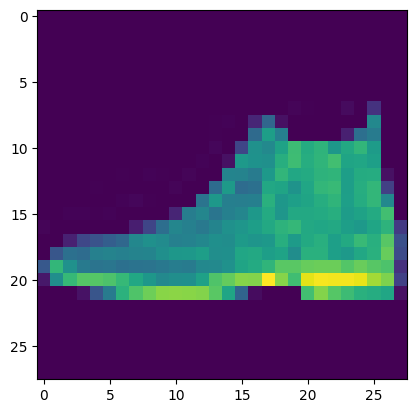

In [80]:
query_index = 0
query_image = x_test1[query_index]
print(query_image.shape, xtst[query_index].shape)

# query_image = tf.image.grayscale_to_rgb(tf.expand_dims(query_image, axis=-1))
# query_image = query_image.numpy()

print(y_train1[query_index])
plt.imshow(xtst[query_index])
plt.show()

In [81]:
query_features = extract_features(model, query_image[np.newaxis, ...])
query_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.        , 0.        , 0.7521087 , ..., 0.        , 0.        ,
        0.40648007]], dtype=float32)

9
9
9
9
9


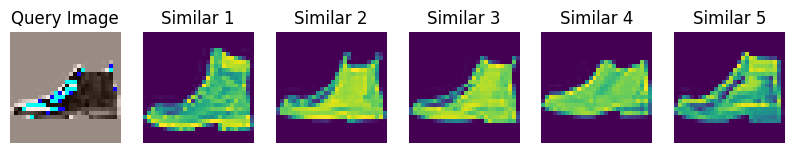

In [82]:
similarities = compute_similarity(query_features, features)

sorted_indices = np.argsort(similarities[0])[::-1]

visualize_similar_images(query_image, sorted_indices, xtrn,y_train1, num_similar=5)

## Evaluate

In [91]:
def evaluate_similarity(
    model,
    query_images,
    query_labels,
    database_features,
    database_labels,
    top_k=5
):
    total_precision = 0
    total_recall = 0
    total_retrieval_accuracy = 0
    num_queries = len(query_images)
    all_recalls = []

    for i, query_image in enumerate(query_images):
        # Extract query features
        query_features = extract_features(model, query_image[np.newaxis, ...])

        # Compute similarity scores
        similarities = compute_similarity(query_features, database_features)

        # Retrieve top-k indices
        sorted_indices = np.argsort(similarities[0])[::-1][:top_k]

        # Get top-k labels
        top_k_labels = database_labels[sorted_indices]

        # Calculate relevant images
        relevant_indices = np.where(database_labels == query_labels[i])[0]
        num_relevant = len(relevant_indices)

        # Debug: Print relevant indices
        print(f"Query {i}: Total relevant images: {num_relevant}")

        if num_relevant == 0:
            print(f"Query {i} has no relevant images in the database.")
            continue

        # Precision@k
        relevant_count = np.sum(top_k_labels == query_labels[i])
        precision_at_k = relevant_count / top_k

        print(f"Query {i}: Total relevant_count: {relevant_count}",top_k_labels)

        # Recall@k same as precision
        recall_at_k = relevant_count / top_k

        # Retrieval Accuracy
        retrieval_accuracy = 1 if relevant_count > 0 else 0

        # Debug: Log intermediate results
        print(f"Query {i}: Precision@{top_k} = {precision_at_k}, Recall@{top_k} = {recall_at_k}, Retrieval Accuracy = {retrieval_accuracy}")

        total_precision += precision_at_k
        total_recall += recall_at_k
        total_retrieval_accuracy += retrieval_accuracy

        all_recalls.append(recall_at_k)

    # Average metrics
    avg_precision = total_precision / num_queries
    avg_recall = total_recall / num_queries
    avg_retrieval_accuracy = total_retrieval_accuracy / num_queries

    return avg_precision, avg_recall, avg_retrieval_accuracy, all_recalls



avg_precision, avg_recall, avg_retrieval_accuracy, all_recalls = evaluate_similarity(
    model=model,
    query_images=x_test1[:5],
    query_labels=y_test1[:5],
    database_features=features,
    database_labels=y_train1,
    top_k=5
)

print(f"Precision@{top_k}: {avg_precision:.4f}")
print(f"Recall@{top_k}: {avg_recall:.4f}")
print(f"Retrieval Accuracy: {avg_retrieval_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Query 0: Total relevant images: 506
Query 0: Total relevant_count: 5 [9 9 9 9 9]
Query 0: Precision@5 = 1.0, Recall@5 = 1.0, Retrieval Accuracy = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Query 1: Total relevant images: 504
Query 1: Total relevant_count: 4 [2 2 0 2 2]
Query 1: Precision@5 = 0.8, Recall@5 = 0.8, Retrieval Accuracy = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Query 2: Total relevant images: 556
Query 2: Total relevant_count: 5 [1 1 1 1 1]
Query 2: Precision@5 = 1.0, Recall@5 = 1.0, Retrieval Accuracy = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Query 3: Total relevant images: 556
Query 3: Total relevant_count: 4 [1 3 1 1 1]
Query 3: Precision@5 = 0.8, Recall@5 = 0.8, Retrieval Accuracy = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Query 4: Total relevant images: 493
Query 4: Total relevant_count: 2 [6 2 6 0 2]
Query 4: Precision@5 = 0.4, Recall@5 = 0.4, Retrieval Accuracy = 1
Precision@5: 0.8000
Recall@5: 0.8000
Retrieval Accuracy: 1.0000


# Autoencoder

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [93]:
x_train.shape

(5000, 28, 28)

In [94]:
x_train1 = x_train[:500].astype("float32") / 255.0
x_test1 = x_test[:500].astype("float32") / 255.0

x_train1 = np.expand_dims(x_train1, axis=-1)
x_test1 = np.expand_dims(x_test1, axis=-1)

In [95]:
x_train1.shape

(500, 28, 28, 1)

## Train

In [96]:
input_shape = x_train1.shape[1:]

input_img = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
embed = tf.keras.layers.Dense(64, activation='relu', name="embed")(x)

x = tf.keras.layers.Dense(7 * 7 * 64, activation='relu')(embed)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
output = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(input_img, output)
encoder = Model(input_img, embed)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embed (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3136)                │         203,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_10 (UpSampling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,617 (1.52 MB)

 Trainable params: 399,617 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam', loss='binary_crossentropy')

history = model.fit(
    x_train1,
    x_train1,
    epochs=25,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test1, x_test1)
)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 554ms/step - loss: 0.6664 - val_loss: 0.5656
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - loss: 0.5350 - val_loss: 0.4930
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - loss: 0.4749 - val_loss: 0.4161
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step - loss: 0.4057 - val_loss: 0.3882
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - loss: 0.3782 - val_loss: 0.3731
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - loss: 0.3643 - val_loss: 0.3662
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 644ms/step - loss: 0.3545 - val_loss: 0.3459
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - loss: 0.3456 - val_loss: 0.3382
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - loss: 0.3258 - val_loss: 0.3358
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - loss: 0.3274 - val_loss: 0.3286
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - loss: 0.3216 - val_loss: 0.3278
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - loss: 0.3220 - val_lo

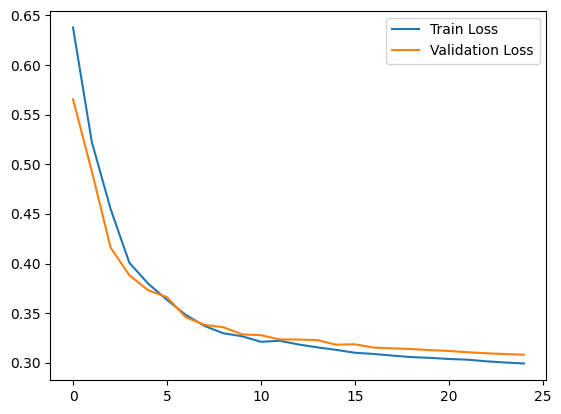

In [98]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


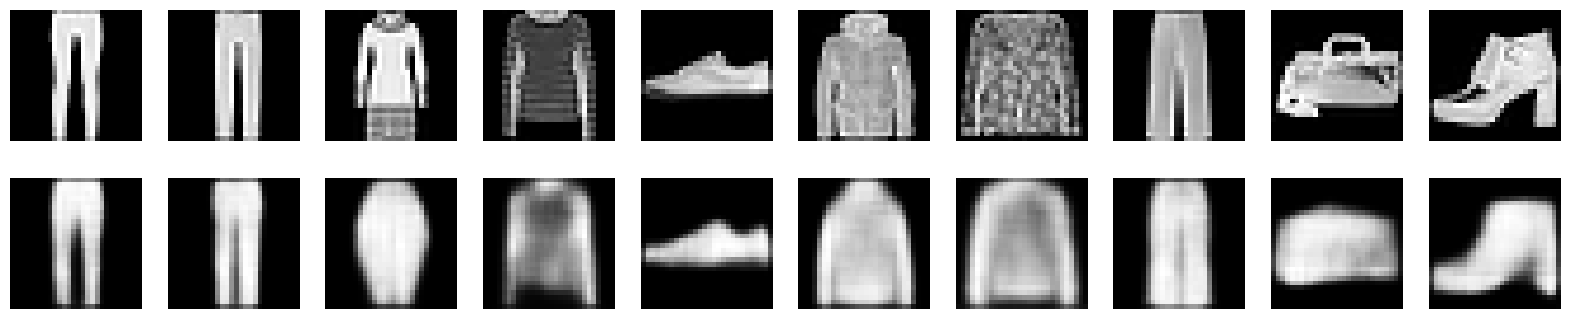

In [99]:
def visualize_reconstruction(encoder, model, data, n=10):
    idx = np.random.choice(len(data), n)
    original = data[idx]
    reconstructed = model.predict(original)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].squeeze(), cmap="gray")
        plt.axis("off")
        # Reconstructed
        plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].squeeze(), cmap="gray")
        plt.axis("off")
    plt.show()

visualize_reconstruction(encoder, model, x_test1)

In [100]:
def get_embeddings(encoder, data):
    embeddings = encoder.predict(data)
    return embeddings

embeddings = get_embeddings(encoder, x_test1[:10])
embeddings.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


(10, 64)

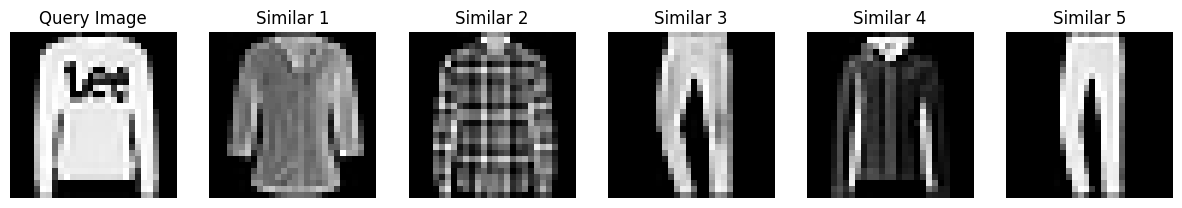

In [101]:
def find_similar_images(embeddings, data, query_idx, top_k=5):
    query_embedding = embeddings[query_idx].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = np.argsort(similarities)[::-1][1:top_k+1]

    plt.figure(figsize=(15, 3))
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(data[query_idx].squeeze(), cmap="gray")
    plt.title("Query Image")
    plt.axis("off")

    for i, idx in enumerate(top_indices):
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(data[idx].squeeze(), cmap="gray")
        plt.title(f"Similar {i+1}")
        plt.axis("off")
    plt.show()

query_image_idx = 1
find_similar_images(embeddings, x_test1, query_image_idx, top_k=5)


## Evaluate

In [103]:
from sklearn.metrics import classification_report

def compute_metrics_with_f1(embeddings, labels, top_k=5):
    n = len(embeddings)
    precisions = []
    recalls = []
    retrieval_accuracies = []

    # Store true labels and predicted relevance for F1 score calculation
    true_labels = []
    predicted_labels = []

    for i in range(n):
        # Compute cosine similarity
        query_embedding = embeddings[i].reshape(1, -1)
        similarities = cosine_similarity(query_embedding, embeddings).flatten()
        # Get top-k indices (excluding the query image itself)
        top_indices = np.argsort(similarities)[::-1][1:top_k + 1]

        # Evaluate relevance
        relevant_labels = labels[top_indices]
        query_label = labels[i]

        # Calculate metrics
        num_relevant = np.sum(relevant_labels == query_label)
        precision = num_relevant / top_k
        recall = num_relevant / np.sum(labels == query_label)  # Total relevant items in the dataset
        retrieval_accuracy = 1 if num_relevant > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        retrieval_accuracies.append(retrieval_accuracy)

        # Prepare labels for classification report
        true_labels.extend([query_label] * len(top_indices))
        predicted_labels.extend(relevant_labels)

    # Aggregate metrics
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_retrieval_accuracy = np.mean(retrieval_accuracies)

    # Compute F1 score and classification report
    report = classification_report(true_labels, predicted_labels, zero_division=0)

    return avg_precision, avg_recall, avg_retrieval_accuracy, report

# Get embeddings and labels
x_test_embeddings = get_embeddings(encoder, x_test1)
y_test_labels = y_test[:500]  # Adjust based on dataset size

# Calculate metrics
precision, recall, retrieval_accuracy, classification_report_output = compute_metrics_with_f1(
    x_test_embeddings, y_test_labels, top_k=5
)

print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")
print(f"Retrieval Accuracy: {retrieval_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_output)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Precision@5: 0.6592
Recall@5: 0.0665
Retrieval Accuracy: 0.9180

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       275
           1       0.78      0.91      0.84       260
           2       0.50      0.52      0.51       325
           3       0.69      0.57      0.63       230
           4       0.44      0.47      0.45       285
           5       0.81      0.68      0.74       195
           6       0.24      0.22      0.23       235
           7       0.74      0.80      0.77       235
           8       0.93      0.84      0.88       220
           9       0.80      0.85      0.82       240

    accuracy                           0.66      2500
   macro avg       0.67      0.66      0.67      2500
weighted avg       0.66      0.66      0.66      2500



# Siamese


In [104]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [127]:
(x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train_val.shape

(60000, 28, 28)

In [128]:
x_train_val = x_train_val.astype("float32")
x_test = x_test.astype("float32")

x_train, x_val = x_train_val[:5000], x_train_val[5000:]
y_train, y_val = y_train_val[:5000], y_train_val[5000:]
del x_train_val, y_train_val

In [129]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")

In [130]:
pairs_train, labels_train = make_pairs(x_train, y_train)

pairs_val, labels_val = make_pairs(x_val, y_val)

pairs_test, labels_test = make_pairs(x_test, y_test)

pairs_train.shape

(10000, 2, 28, 28)

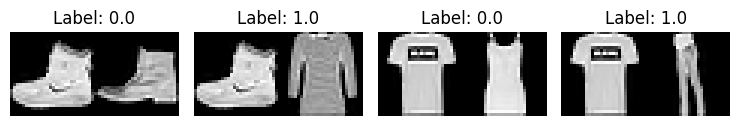

In [109]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    num_row = to_show // num_col if to_show // num_col != 0 else 1
    to_show = num_row * num_col

    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.keras.ops.concatenate([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()



visualize(pairs_train[:-1], labels_train[:-1], to_show=4, num_col=4)

## Train


In [115]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.keras.ops.sum(tf.keras.ops.square(x - y), axis=1, keepdims=True)
    return tf.keras.ops.sqrt(tf.keras.ops.maximum(sum_square, keras.backend.epsilon()))


input = keras.layers.Input((28, 28, 1))
x = keras.layers.BatchNormalization()(input)
x = keras.layers.Conv2D(4, (5, 5), activation="tanh")(x)
x = keras.layers.AveragePooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(16, (5, 5), activation="tanh")(x)
x = keras.layers.AveragePooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)

x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(10, activation="tanh")(x)
embedding_network = keras.Model(input, x)


input_1 = keras.layers.Input((28, 28, 1))
input_2 = keras.layers.Input((28, 28, 1))

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = keras.layers.Lambda(euclidean_distance, output_shape=(1,))(
    [tower_1, tower_2]
)
normal_layer = keras.layers.BatchNormalization()(merge_layer)
output_layer = keras.layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

siamese.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_17            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_18             │ (None, 10)             │          5,318 │ input_layer_16[0][0],  │
│ (Functional)              │                        │                │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 1)              │              0 │ functional_18[0][0],   │
│                           │                        │                │ functional_18[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 1)              │              4 │ lambda_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │              2 │ batch_normalization_8… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,324 (20.80 KB)

 Trainable params: 4,808 (18.78 KB)

 Non-trainable params: 516 (2.02 KB)

In [111]:
embedding_network.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 24, 24, 4)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 4)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 16)            │           1,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,318 (20.77 KB)

 Trainable params: 4,804 (18.77 KB)

 Non-trainable params: 514 (2.01 KB)

In [117]:
def loss(margin=1):
    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        square_pred = tf.keras.ops.square(y_pred)
        margin_square = tf.keras.ops.square(tf.keras.ops.maximum(margin - (y_pred), 0))
        return tf.keras.ops.mean((1 - y_true) * square_pred + (y_true) * margin_square)

    return contrastive_loss


siamese.compile(loss=loss(margin=1), optimizer="adam", metrics=["accuracy"])


In [131]:
x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (60000, 28, 28)
x_train_2 = pairs_train[:, 1]

x_val_1 = pairs_val[:, 0]  # x_val_1.shape = (60000, 28, 28)
x_val_2 = pairs_val[:, 1]

x_test_1 = pairs_test[:, 0]  # x_test_1.shape = (20000, 28, 28)
x_test_2 = pairs_test[:, 1]

In [135]:
x_test_1.shape, labels_test.shape

((20000, 28, 28), (20000,))

In [52]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=16,
    epochs=15,
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 162ms/step - accuracy: 0.7879 - loss: 0.2085 - val_accuracy: 0.8472 - val_loss: 0.1298
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 92ms/step - accuracy: 0.8353 - loss: 0.1326 - val_accuracy: 0.8704 - val_loss: 0.0997
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8555 - loss: 0.1092 - val_accuracy: 0.8761 - val_loss: 0.0929
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8623 - loss: 0.1030 - val_accuracy: 0.8900 - val_loss: 0.0850
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.8668 - loss: 0.0997 - val_accuracy: 0.8881 - val_loss: 0.0845
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8786 - loss: 0.0911 - val_accuracy: 0.8862 - val_loss: 0.0848
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8690 - loss: 0.0963 - val_accuracy: 0.8904 - val_loss: 0.0818
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.8893 - loss: 0.0858 

In [58]:
siamese.save('siamese.keras')

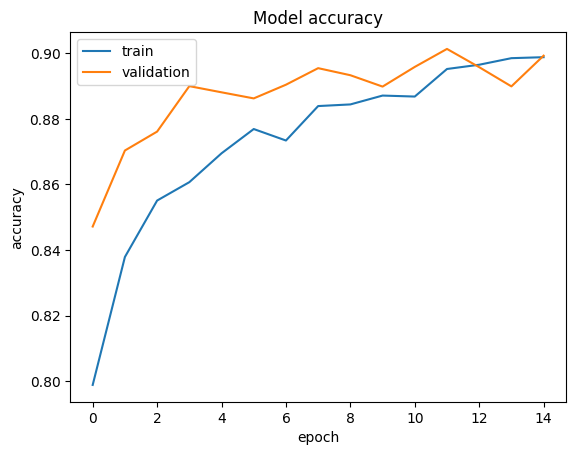

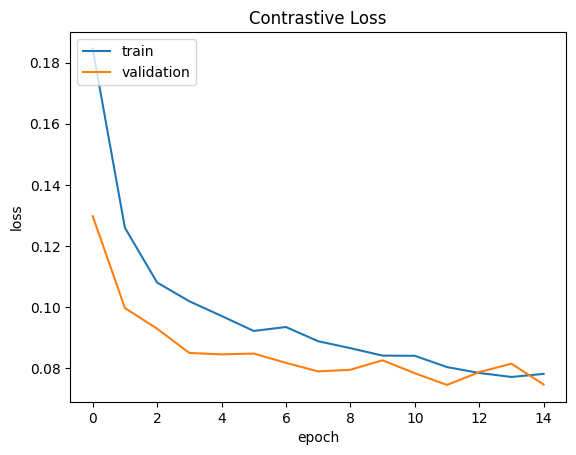

In [54]:
def plt_metric(history, metric, title, has_valid=True):

    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()



plt_metric(history=history.history, metric="accuracy", title="Model accuracy")

plt_metric(history=history.history, metric="loss", title="Contrastive Loss")

In [55]:
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
results

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8984 - loss: 0.0757


[0.07748904079198837, 0.8962500095367432]

In [56]:
predictions = siamese.predict([x_test_1, x_test_2])
predictions

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step


array([[0.01764811],
       [0.9831689 ],
       [0.00398097],
       ...,
       [0.9913797 ],
       [0.2890347 ],
       [0.9950655 ]], dtype=float32)

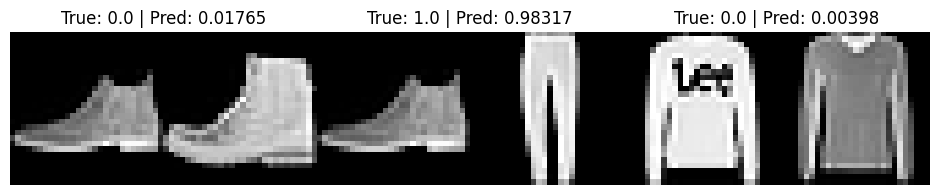

In [57]:
visualize(pairs_test, labels_test, to_show=3, predictions=predictions, test=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


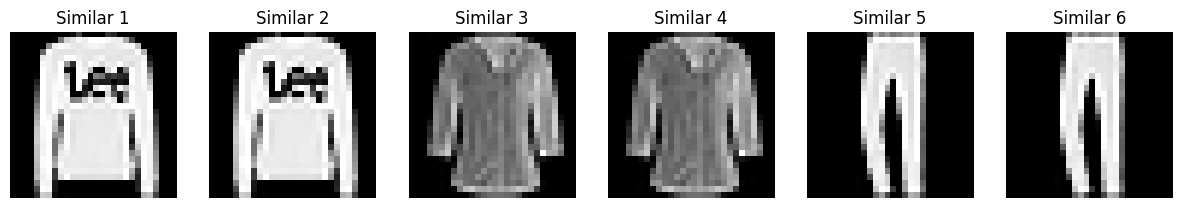

In [65]:
def find_similar_images_siamese(model, data, query_idx, top_k=5):

    embeddings = model.predict(data)

    query_embedding = embeddings[query_idx].reshape(1, -1)
    distances = np.linalg.norm(embeddings - query_embedding, axis=1)

    top_indices = np.argsort(distances)[:top_k + 1]

    plt.figure(figsize=(15, 3))
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(data[query_idx].squeeze(), cmap="gray")
    plt.title("Query Image")
    plt.axis("off")

    for i, idx in enumerate(top_indices):
        plt.subplot(1, top_k + 1, i + 1)
        plt.imshow(data[idx].squeeze(), cmap="gray")
        plt.title(f"Similar {i+1}")
        plt.axis("off")
    plt.show()

query_image_idx = 2
find_similar_images_siamese(embedding_network, x_test_1[:10], query_image_idx, top_k=5)


## Evaluate

In [118]:
siamese = tf.keras.models.load_model("/content/siamese.keras", custom_objects={
    'euclidean_distance': euclidean_distance,
    'contrastive_loss': loss
    })

In [122]:
embedding_network = siamese.get_layer('functional_11')

embedding_network.summary()  # Check the model summary

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 4)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 16)            │           1,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,318 (20.77 KB)

 Trainable params: 4,804 (18.77 KB)

 Non-trainable params: 514 (2.01 KB)

(10000,)

In [138]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(labels_test)

def compute_metrics_siamese(embedding_model, data, labels, top_k=5):
    """
    Compute Precision@k, Recall@k, Retrieval Accuracy, and Classification Report for Siamese Model
    """
    # Generate embeddings
    embeddings = embedding_model.predict(data)

    n = len(embeddings)
    precisions = []
    recalls = []
    retrieval_accuracies = []

    # Store true labels and predicted relevance for F1 score calculation
    true_labels = []
    predicted_labels = []

    for i in range(n):
        # Compute cosine similarity
        query_embedding = embeddings[i].reshape(1, -1)
        distances = np.linalg.norm(embeddings - query_embedding, axis=1)
        top_indices = np.argsort(distances)[1:top_k + 1]  # Exclude the query itself

        # Get the true and predicted labels
        relevant_labels = labels[top_indices]
        query_label = labels[i]

        # Calculate metrics
        num_relevant = np.sum(relevant_labels == query_label)
        precision = num_relevant / top_k
        recall = num_relevant / np.sum(labels == query_label)  # Total relevant items in the dataset
        retrieval_accuracy = 1 if num_relevant > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        retrieval_accuracies.append(retrieval_accuracy)

        # Prepare labels for classification report
        true_labels.extend([query_label] * len(top_indices))
        predicted_labels.extend(relevant_labels)

    # Aggregate metrics
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_retrieval_accuracy = np.mean(retrieval_accuracies)

    # Compute F1-score and classification report
    report = classification_report(true_labels, predicted_labels, zero_division=0)

    return avg_precision, avg_recall, avg_retrieval_accuracy, report


# Evaluate the Siamese network embeddings
precision, recall, retrieval_accuracy, classification_report_output = compute_metrics_siamese(
    embedding_network, x_test_1, y_test_encoded, top_k=5
)

print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")
print(f"Retrieval Accuracy: {retrieval_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_output)


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Precision@5: 0.4941
Recall@5: 0.0002
Retrieval Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49     50000
           1       0.49      0.50      0.49     50000

    accuracy                           0.49    100000
   macro avg       0.49      0.49      0.49    100000
weighted avg       0.49      0.49      0.49    100000



In [125]:
y_test_encoded.shape

(10000,)

# CLIP

In [141]:
import torch
from transformers import CLIPProcessor, CLIPModel
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [142]:
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

transform = transforms.Compose([
    transforms.Grayscale(3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])


In [143]:
dataset = FashionMNIST(root="./data", train=False, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)
images, labels = next(iter(data_loader))

images.shape

torch.Size([64, 3, 224, 224])

## Model Load

In [144]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)


In [145]:
def get_clip_embeddings(images, model, processor):
    images = (images * 0.5) + 0.5

    with torch.no_grad():
        inputs = processor(images=images, return_tensors="pt", padding=True).to(device)
        embeddings = model.get_image_features(**inputs)
        embeddings = embeddings / embeddings.norm(dim=1, keepdim=True)
    return embeddings

all_embeddings = []
for batch in data_loader:
    batch_images = batch[0].to(device)
    batch_embeddings = get_clip_embeddings(batch_images, model, processor)
    all_embeddings.append(batch_embeddings)

    break

all_embeddings = torch.cat(all_embeddings)
all_embeddings.shape


torch.Size([64, 512])

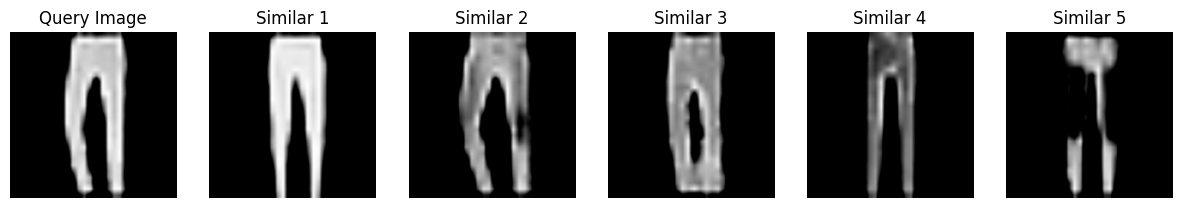

In [146]:
def find_similar_images_clip(query_idx, all_embeddings, images, top_k=5):

    query_embedding = all_embeddings[query_idx].unsqueeze(0)
    similarities = (all_embeddings @ query_embedding.T).squeeze(1).cpu().numpy()

    top_indices = np.argsort(similarities)[::-1][:top_k + 1]  # +1 to include query image

    plt.figure(figsize=(15, 3))
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(images[query_idx].permute(1, 2, 0).numpy(), cmap="gray")
    plt.title("Query Image")
    plt.axis("off")

    for i, idx in enumerate(top_indices[1:]):
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(images[idx].permute(1, 2, 0).numpy(), cmap="gray")
        plt.title(f"Similar {i+1}")
        plt.axis("off")
    plt.show()

query_image_idx = 2
find_similar_images_clip(query_image_idx, all_embeddings, images, top_k=5)


# END